### APPLE QUALITY PREDICTION: A MACHINE LEARNING PROJECT

#### -> Import all necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib
import tkinter as tk
from tkinter import messagebox

#### -> Suppress unnecessary warnings.

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Load the dataset:

In [4]:
df=pd.read_csv('apple_quality.csv')
print('First 10 rows of the dataset: ')
print(df.head(10))

First 10 rows of the dataset: 
   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5     5 -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
6     6  1.331606  1.635956   0.875974    -1.677798   3.106344 -1.847417   
7     7 -1.995462 -0.428958   1.530644    -0.742972   0.158834  0.974438   
8     8 -3.867632 -3.734514   0.986429    -1.207655   2.292873  4.080921   
9     9 -0.727983 -0.442820  -4.092223     0.597513   0.393714  1.620857   

    Acidity Quality  
0 -0.491590    good  
1 -0.722809    good  
2  2.621636     bad  
3  0.790723    good  
4  0.501984    good  


#### 2. Exploratory Data Analysis (EDA):
    The EDA section helps us understand the data by checking its shape, missing values, basic statistics, and spotting any errors or unusual values.

In [5]:
print('No. of Rows and Columns: ',df.shape)

No. of Rows and Columns:  (4000, 9)


In [6]:
print('Columns: ',df.columns)

Columns:  Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')


In [7]:
print('DataFrame info: ',df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB
DataFrame info:  None


In [8]:
print('Summary statistics:\n',df.describe())

Summary statistics:
               A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity  
count  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877  
std       1.930286     1.874427     2.110270  
min      -5.961897    -5.864599    -7.010538  
25%      -0.801286    -0.771677    -1.377424  
50%       0.534219     0.50344

In [9]:
print('Datatypes: \n',df.dtypes)

Datatypes: 
 A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


In [10]:
# Checking for any nulls:

print('Missing values: ')
print(df.isnull().sum())

Missing values: 
A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


##### :- No missing values found in our dataset.

In [11]:
# Removing any leading & trailing whitespaces from all columns if present.

df.columns=df.columns.str.strip()

In [12]:
# Checking for any duplicates:

print('No. of duplicates: ',df.duplicated().sum())

No. of duplicates:  0


##### :- Here, we have no duplicates in our dataset.

#### -> Target Variable ('Quality') Distribution:

In [13]:
# Check whether 'Quality' is binary or multi-class:

print('Unique classes: ',df['Quality'].unique())

Unique classes:  ['good' 'bad']


In [14]:
'''
Here, only two classes are present in 'Quality'
And that makes it a binary classification problem.
Since there are only two possible classes (2 distinct outcomes, i.e., 'Good' & 'Bad').
''';

In [15]:
# Check for distribution of 'Quality':

print("Distribution of 'Quality':")
print(df['Quality'].value_counts())
print("\nNormalized Value Counts for 'Quality':")
print(df['Quality'].value_counts(normalize=True))

Distribution of 'Quality':
Quality
good    2004
bad     1996
Name: count, dtype: int64

Normalized Value Counts for 'Quality':
Quality
good    0.501
bad     0.499
Name: proportion, dtype: float64


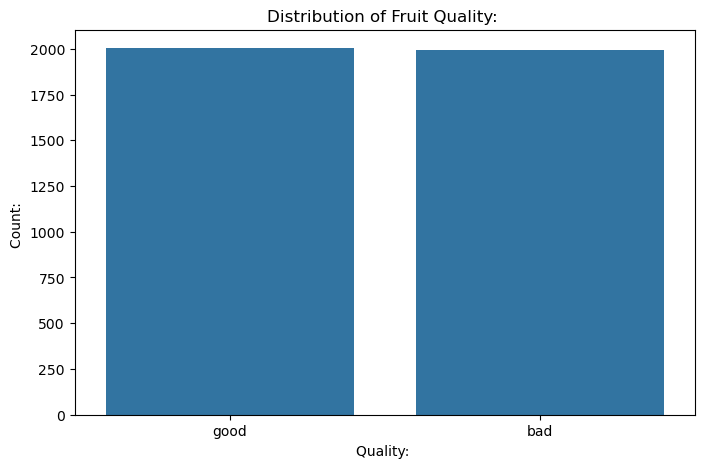

In [16]:
# Plot a bar chart to see imbalance:

plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Quality')
plt.title('Distribution of Fruit Quality: ')
plt.xlabel('Quality: ')
plt.ylabel('Count: ')
plt.show()

In [17]:
'''
The distribution of the 'Quality' variable is well balanced.
Therefore, we don't need to do any resampling.
''';

#### -> Univariate Analysis:
    Plot histograms, box-plots and density plots for all numerical features.

In [18]:
# Separating only the numerical features for analysis.
# 'A_id' is dropped because it is an identifier and does not provide useful information for modeling.
# 'Quality' is dropped because it is the target variable.

features=df.drop(columns=['A_id','Quality'],axis=1)

In [19]:
def univariate_analysis(df, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1,3,1)
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Histogram of {feature}')

    plt.subplot(1,3,2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

    plt.subplot(1,3,3)
    sns.kdeplot(df[feature],fill=True)
    plt.title(f'Density Plot of {feature}')

    plt.tight_layout()
    plt.show()

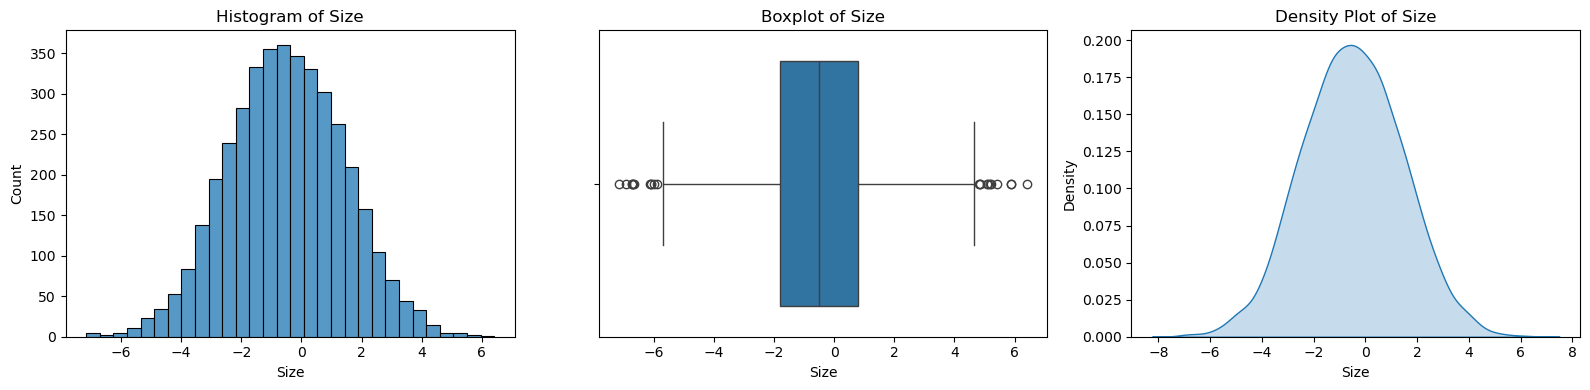

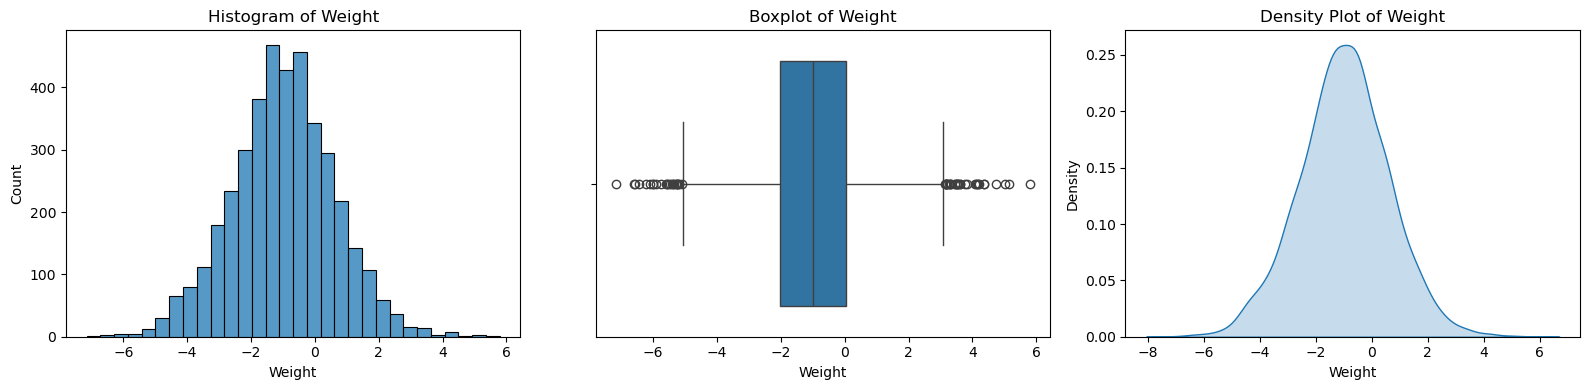

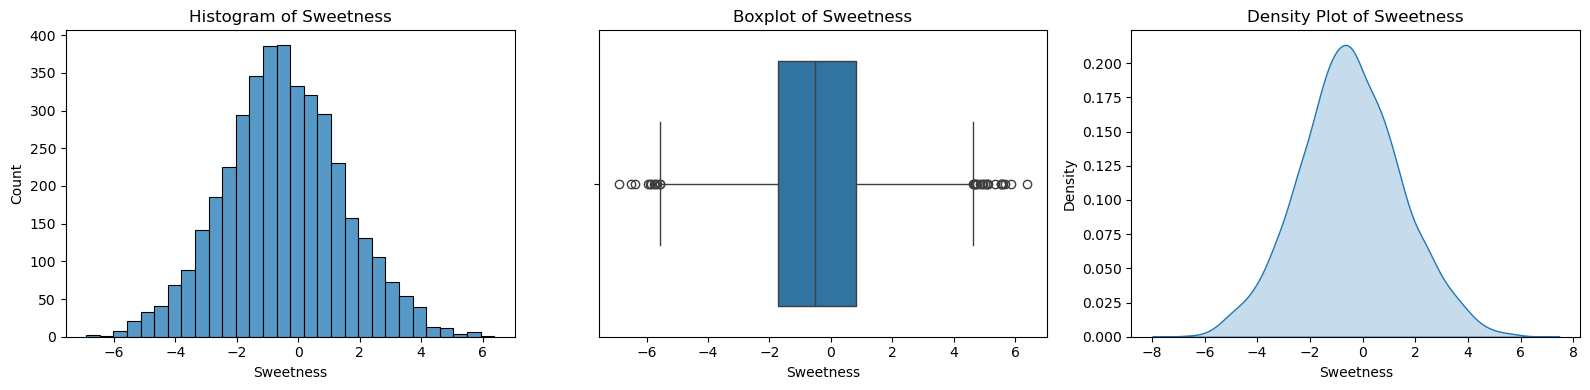

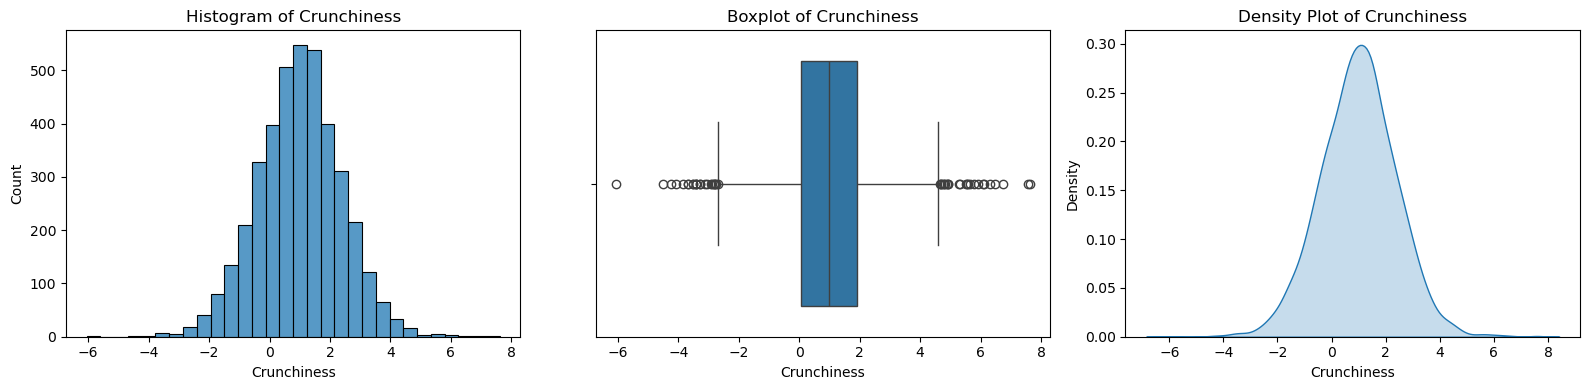

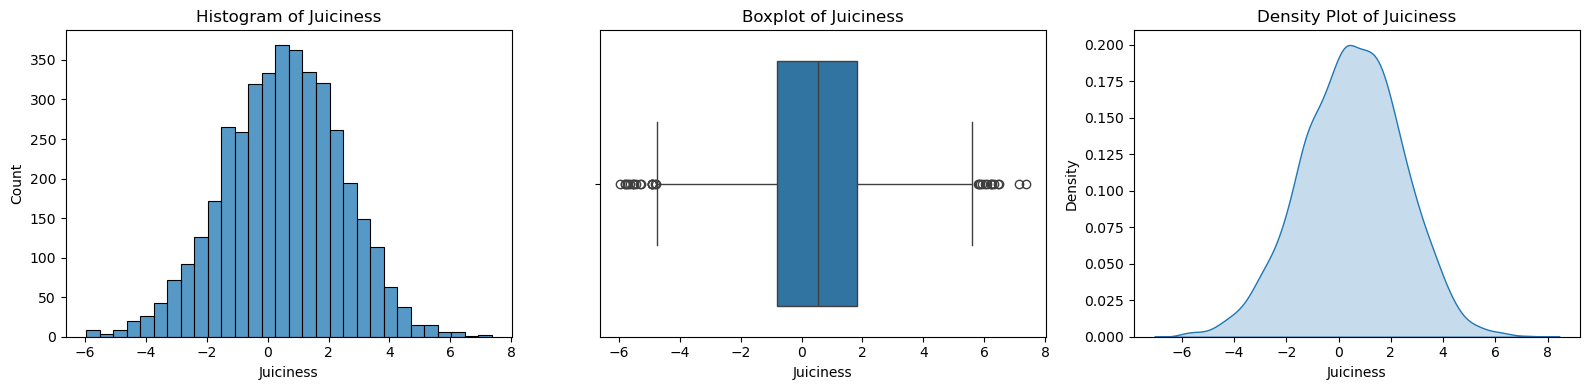

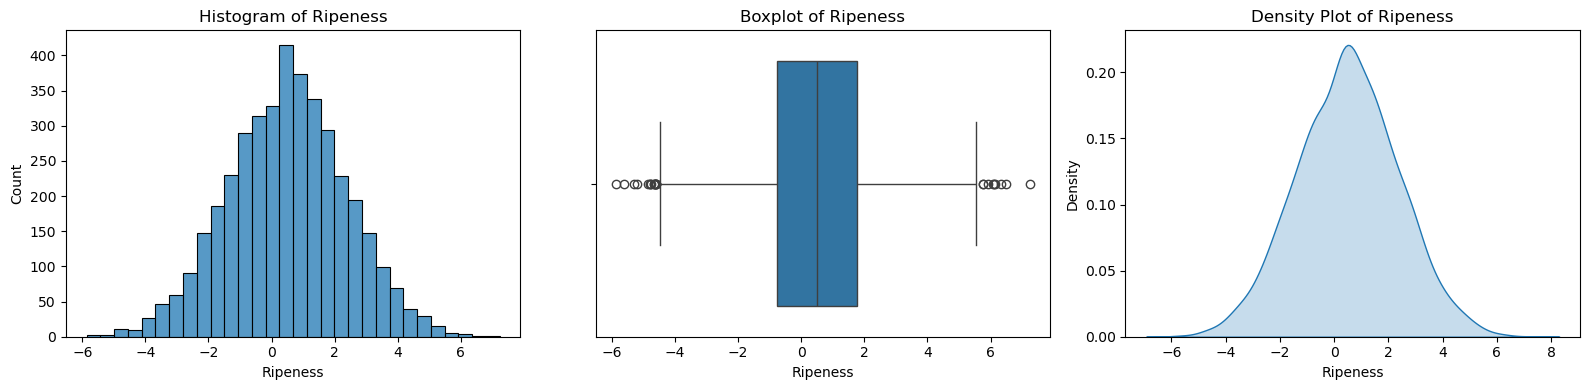

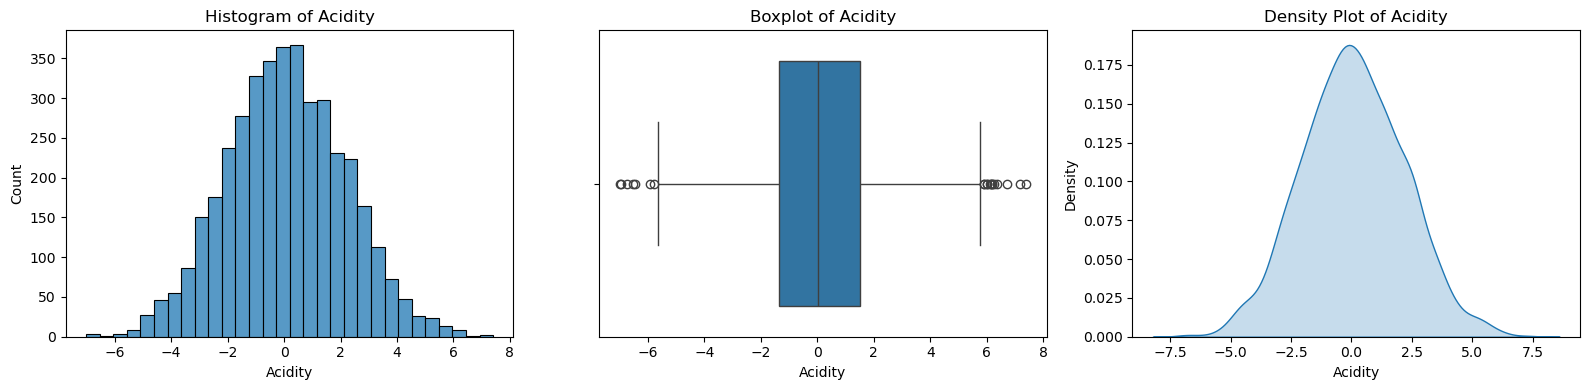

In [20]:
# Check each feature one by one to see how the data looks.

for feature in features:
    univariate_analysis(df,feature)

In [21]:
# Finding ranges of each numerical feature: using range=max-min

for feature in features:
    min_val = df[feature].min()
    max_val = df[feature].max()
    range_val = max_val - min_val
    print(feature,'\n-> Min: ',min_val,'Max: ',max_val,'Range: ',range_val)

Size 
-> Min:  -7.151703059 Max:  6.406366899 Range:  13.558069958
Weight 
-> Min:  -7.149847675 Max:  5.79071359 Range:  12.940561265
Sweetness 
-> Min:  -6.894485494 Max:  6.374915513 Range:  13.269401007
Crunchiness 
-> Min:  -6.055057805 Max:  7.619851801 Range:  13.674909606
Juiciness 
-> Min:  -5.961897048 Max:  7.364402864 Range:  13.326299912
Ripeness 
-> Min:  -5.864598918 Max:  7.237836684 Range:  13.102435602
Acidity 
-> Min:  -7.010538475 Max:  7.404736238 Range:  14.415274712999999


In [22]:
'''
To identify the spread of outliers:
We find standard deviation and Variance->
Because, Standard deviation tells us how spread out the data is around the average (mean).
Most normal data points fall within 2 or 3 standard deviations from the mean.
If a data point is farther than 3 standard deviations, it might be an outlier.
And Variance tells:
If variance is large, it means the data points are very spread out, possibly because of some outliers.
If variance is small, most data points are close to the mean, with fewer or no outliers.
''';

In [23]:
for feature in features:
    std_val = df[feature].std()
    var_val = df[feature].var()
    print(feature,'\n->Std: ',std_val,'\n->Var: ',var_val)

Size 
->Std:  1.9280586888549773 
->Var:  3.7174103076691747
Weight 
->Std:  1.6025072141517562 
->Var:  2.5680293714084224
Sweetness 
->Std:  1.9434406589204538 
->Var:  3.7769615947451673
Crunchiness 
->Std:  1.4027572042119607 
->Var:  1.9677277739685564
Juiciness 
->Std:  1.9302856730942972 
->Var:  3.7260027797531037
Ripeness 
->Std:  1.8744267757033413 
->Var:  3.513475737473624
Acidity 
->Std:  2.110269636420917 
->Var:  4.453237938400068


In [24]:
'''
'Acidity' has the highest std and variance.
'Crunchiness' has the lowest std and variance.
So, features like Acidity and Sweetness might have some outliers affecting the spread.
''';

In [25]:
# Now remove outliers cumulatively
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

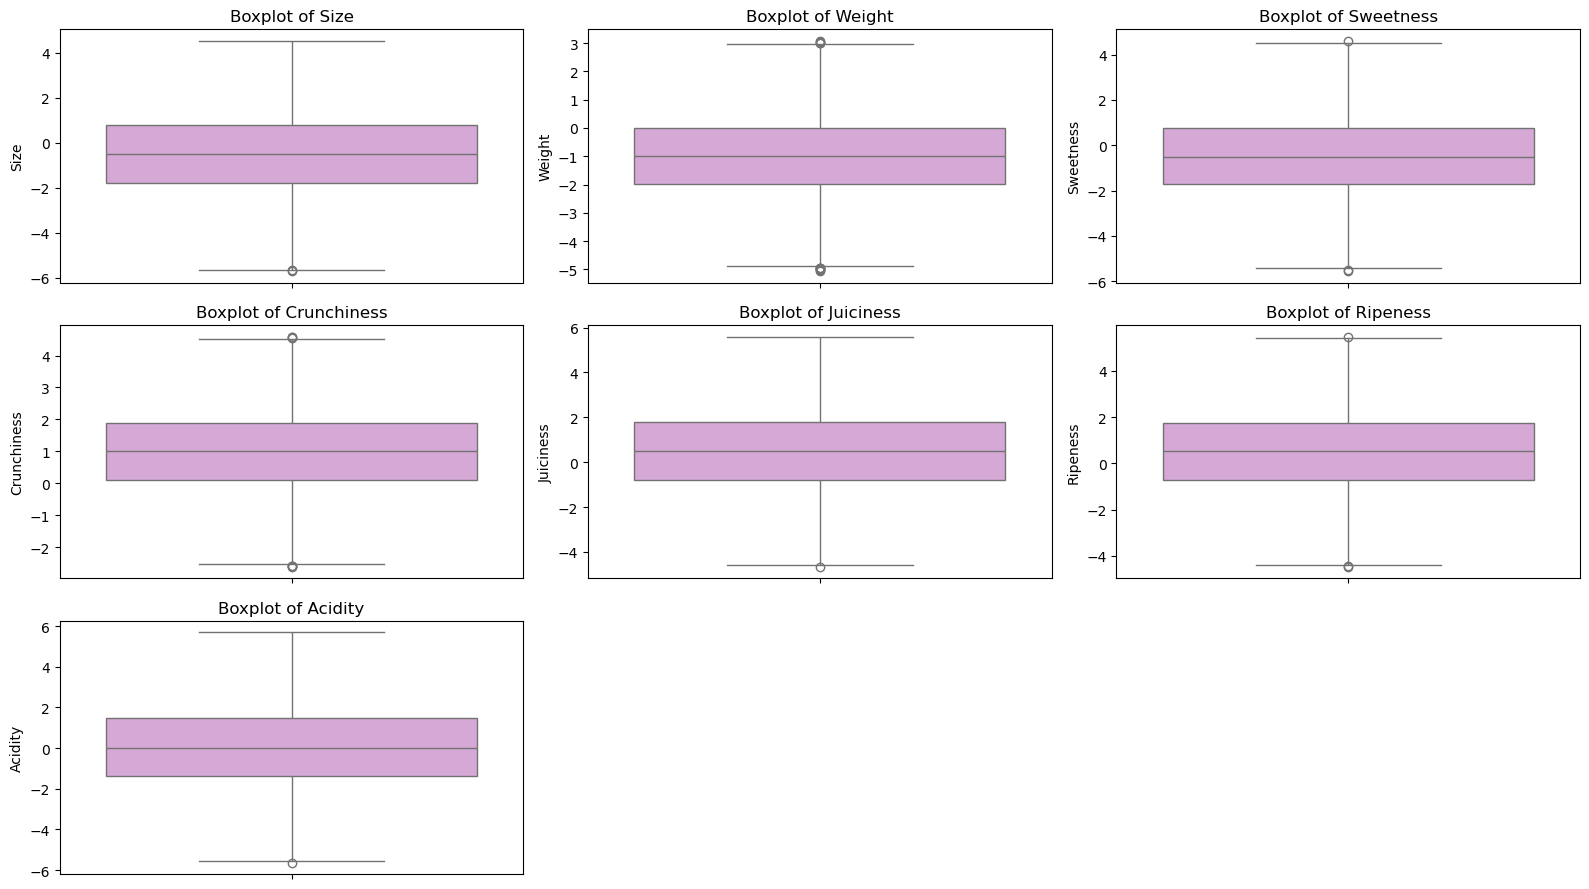

In [26]:
# plot boxplots after removing outliers..

i = 1  # subplot index
plt.figure(figsize=(16,9))

for feature in features:
    plt.subplot(3, 3, i)  
    sns.boxplot(y=df[feature], color='plum')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    i += 1

In [27]:
# Bivariate Analysis (Feature-Target Relationships):

In [28]:
'''
To understand how a numerical feature is spread out (distributed) across different Quality categories ('Good' vs.'Bad').
We are comparing the distribution of each numerical feature for different Quality categories.
''';

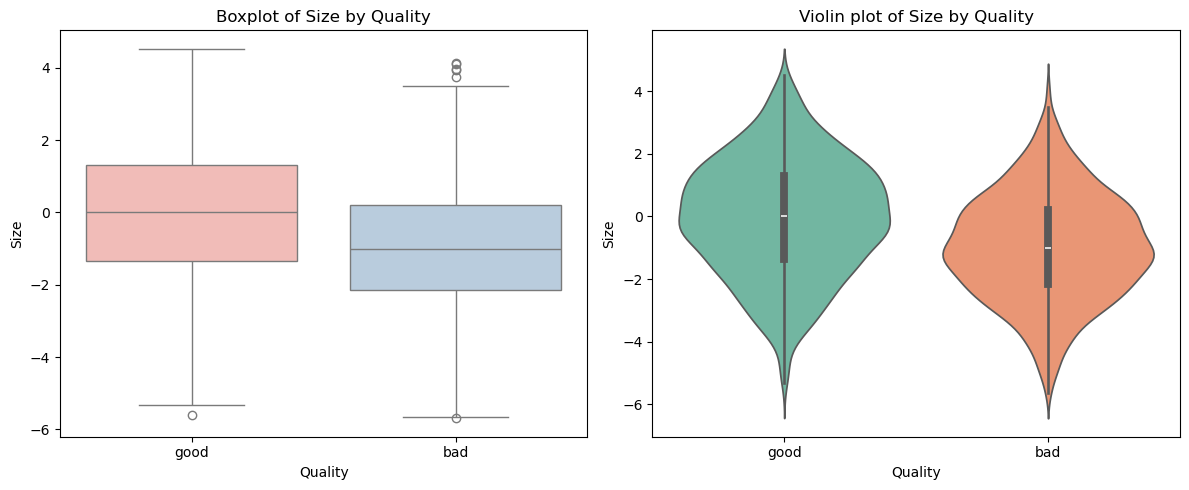

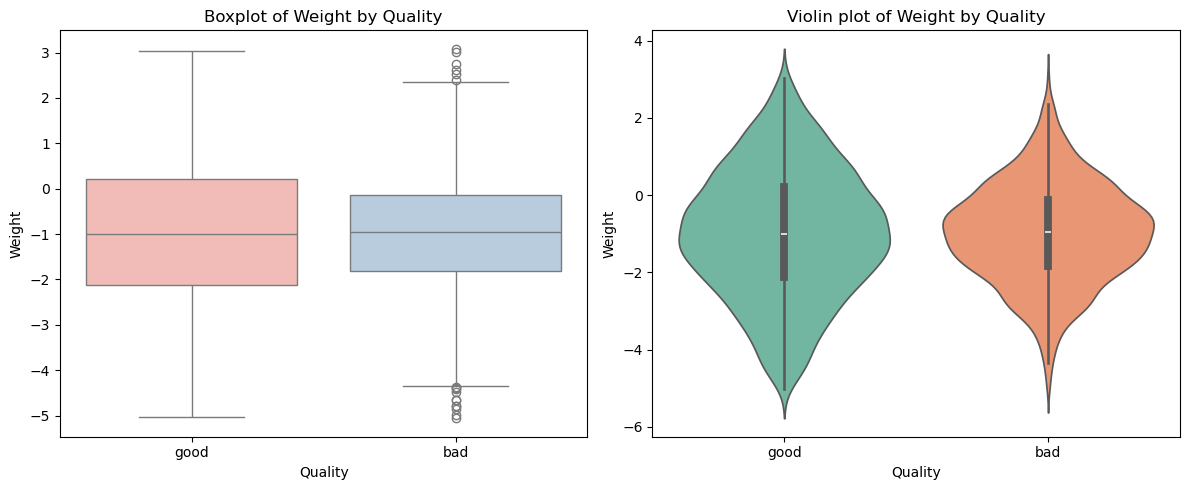

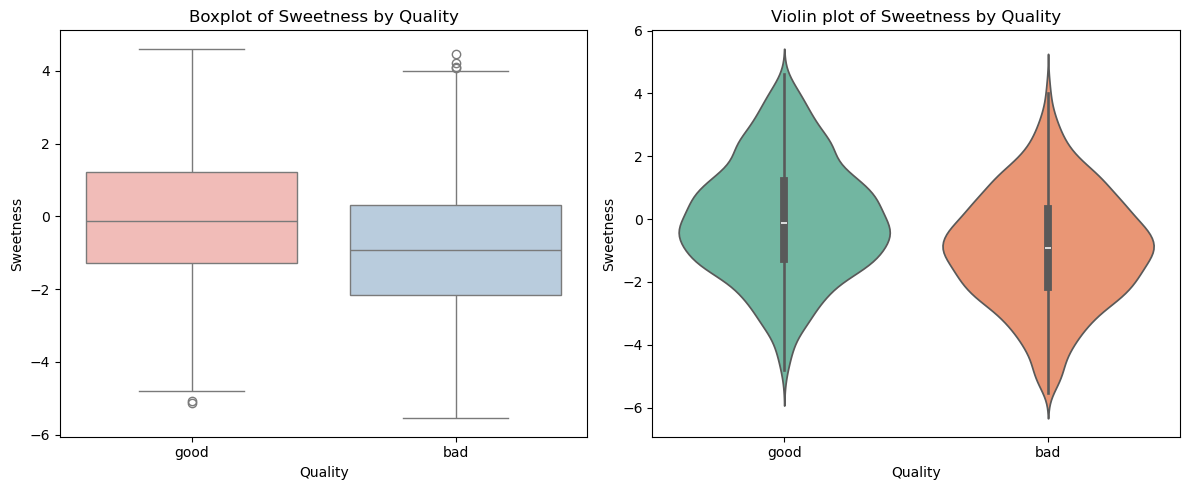

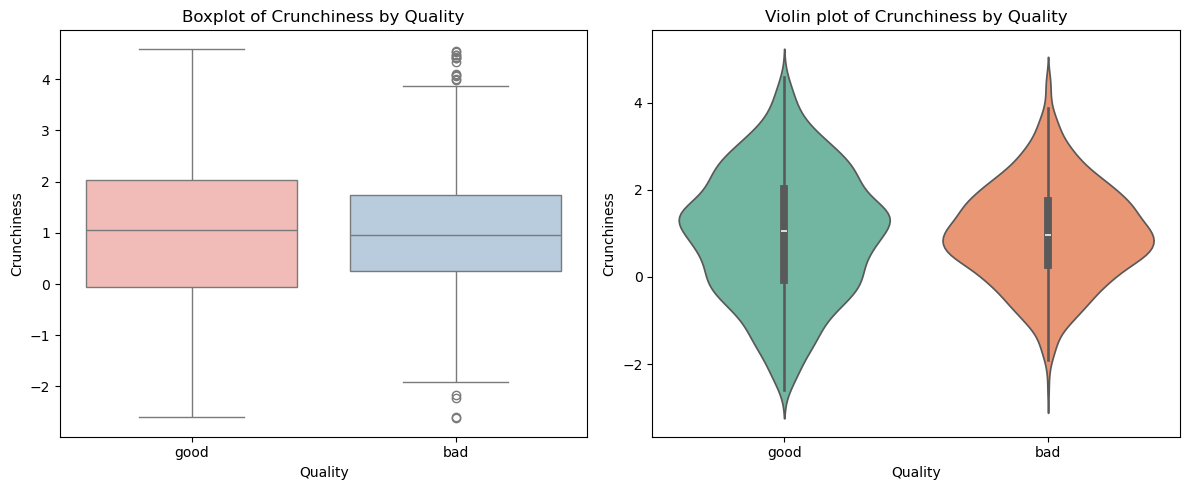

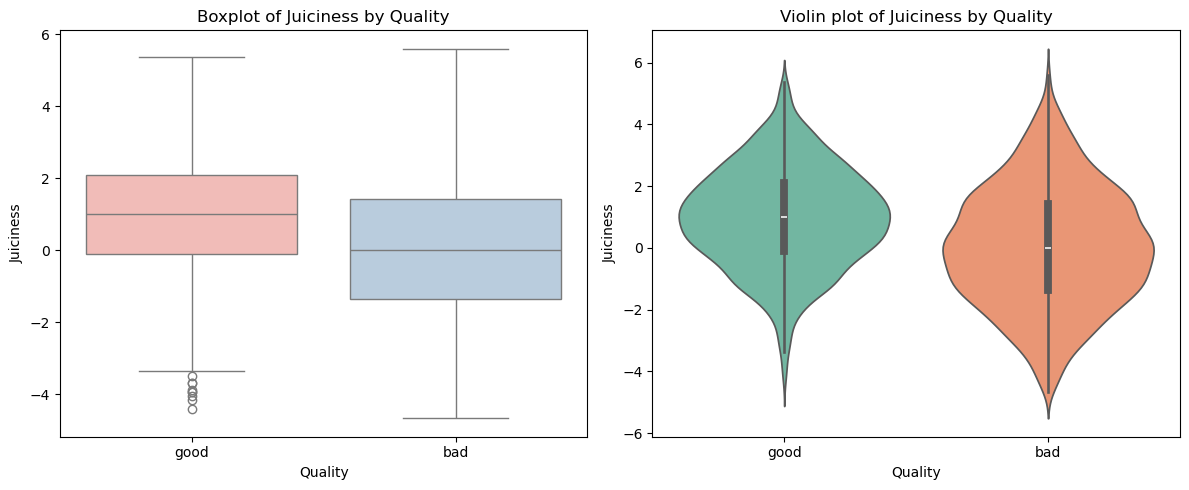

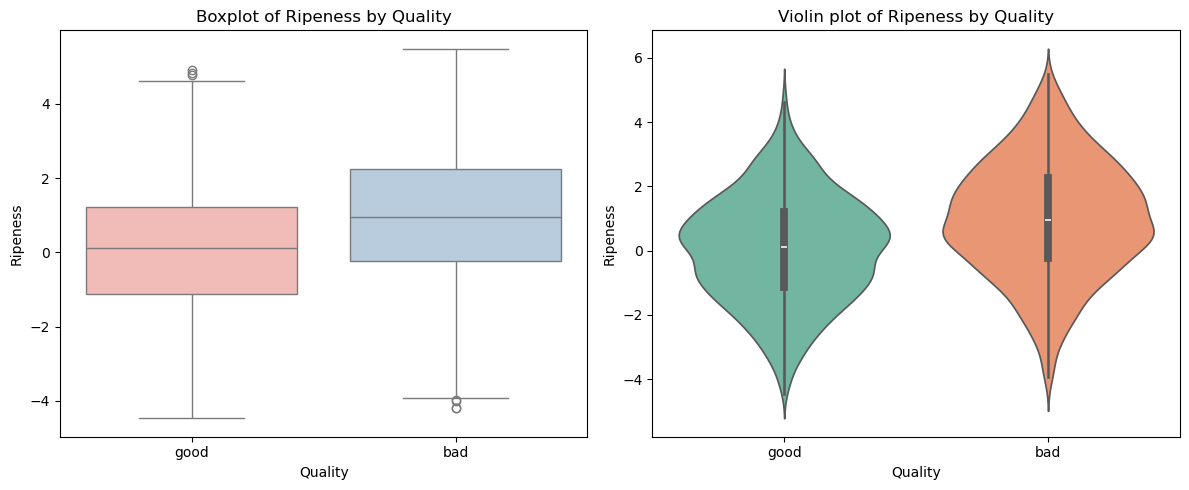

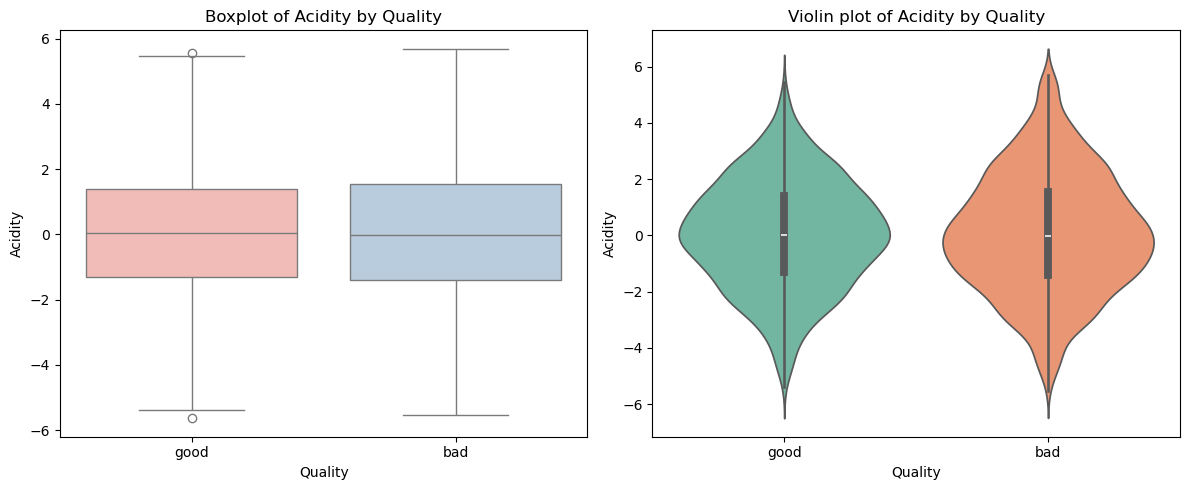

In [29]:
for feature in features:
    plt.figure(figsize=(12,5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='Quality', y=feature, data=df, palette='Pastel1')
    plt.title(f'Boxplot of {feature} by Quality')

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x='Quality', y=feature, data=df, palette='Set2')
    plt.title(f'Violin plot of {feature} by Quality')

    plt.tight_layout()
    plt.show()

In [30]:
# Correlation Matrix:

corr = features.corr()
corr

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


Text(0.5, 1.0, 'Correlation Matrix of all Numerical Features')

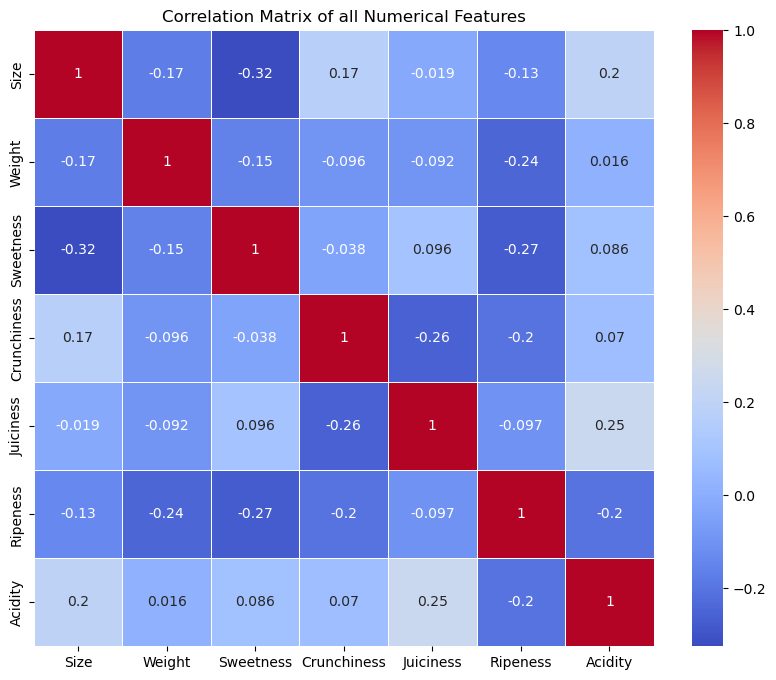

In [31]:
# Plot heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of all Numerical Features')

In [32]:
'''
Weight & Ripeness: -0.24 → Heavier apples are less ripe.
Sweetness & Ripeness: -0.27 → Riper apples tend to be less sweet.
Crunchiness & Juiciness: -0.26 → Juicier apples are generally less crunchy.
Size & Sweetness: -0.32 → Larger apples are generally less sweet.
Juiciness & Acidity: +0.25 → Juicier apples tend to be more acidic.
Size & Acidity: +0.2 → Bigger apples are slightly more acidic.
''';

#### 3. Data Preprocessing:

In [33]:
'''
Inspection of A_id:
-> It doesn't have nulls
-> It doesn't have any duplicates
A_id is just a label.
It doesn't tell us anything about the apple (not its size, weight, sweetness, crunchiness, etc.)
So, dropping it because it doesn't help predict quality.
''';

In [34]:
# dropping A_id:
df.drop(columns=['A_id'],inplace=True)

#### -> Target Variable Encoding:
     Using Label Encoding to convert Quality into numeric (0 and 1)..
     1- GOOD and 0- BAD

In [35]:
le = LabelEncoder()

In [36]:
df['Quality'] = le.fit_transform(df['Quality'])

In [37]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0


#### -> Seperation of Features and Target variable..

In [38]:
x = df.drop('Quality',axis = 1)  # features

In [39]:
y = df['Quality']                # target variable

#### -> Feature Scaling..

In [40]:
'''
Applying StandardScaler so that all features like weight, sweetness, acidity are on the same scale.
This will treat all features fairly, no matter their original units.
''';

In [41]:
scaler =  StandardScaler()
x_scaled = scaler.fit_transform(x) 

#### -> DATA SPLITTING:
    Using stratify beacause of classification task.

In [42]:
'''
Now, splitting the data into training and testing sets.
75% of the data is used for training the model, and 25% is used for testing its performance.
random_state=0 ensures the split gives same result every time the code is run.
stratify=y ensures that the class distribution in the target variable (y) is preserved in both the training and test sets.
''';

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0, stratify=y)

In [44]:
x_train.shape,y_train.shape

((2839, 7), (2839,))

In [45]:
x_test.shape,y_test.shape

((947, 7), (947,))

#### 4. Model Selection:
    This section tells which algorithms we are going to use, and why they are a good fit for the problem.

In [46]:
'''
Models we are using for individual training and evaluation:
- Logistic Regression
- K-Nearest Neighbors Classifier
- Support Vector Machine (RBF Kernel)
- Decision Tree Classifier
- Random Forest Classifier
''';

#### 5. Individual Model Training and Evaluation:

In [47]:
model_scores={}

##### model 1- LOGISTIC REGRESSION:

In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred_lr = lr.predict(x_test)
y_proba_lr = lr.predict_proba(x_test)[:, 1]  

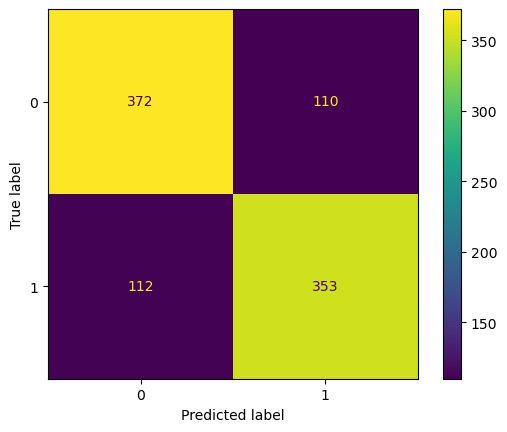

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)

In [51]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)


model_scores['Logistic Regression'] = {
    'Accuracy': accuracy_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'ROC-AUC': roc_auc_lr,
    'Confusion Matrix': conf_matrix_lr,
    'Classification Report': class_report_lr
}
print('ACCURACY USING LOGISTIC REGRESSION: ',accuracy_lr)
print('PRECISION USING LOGISTIC REGRESSION:',precision_lr)
print('RECALL USING LOGISTIC REGRESSION:',recall_lr )
print('F1 USING LOGISTIC REGRESSION:',f1_lr)
print('ROC AUC USING LOGISTIC REGRESSION:',roc_auc_lr )
print('CONFUSION MATRIX USING LOGISTIC REGRESSION:',conf_matrix_lr)
print('Classification Report USING LOGISTIC REGRESSION:\n', class_report_lr)

ACCURACY USING LOGISTIC REGRESSION:  0.7655755015839493
PRECISION USING LOGISTIC REGRESSION: 0.7624190064794817
RECALL USING LOGISTIC REGRESSION: 0.7591397849462366
F1 USING LOGISTIC REGRESSION: 0.7607758620689655
ROC AUC USING LOGISTIC REGRESSION: 0.8405032793468077
CONFUSION MATRIX USING LOGISTIC REGRESSION: [[372 110]
 [112 353]]
Classification Report USING LOGISTIC REGRESSION:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       482
           1       0.76      0.76      0.76       465

    accuracy                           0.77       947
   macro avg       0.77      0.77      0.77       947
weighted avg       0.77      0.77      0.77       947



##### model 2- KNN:

In [52]:
knn = KNeighborsClassifier(
    n_neighbors=3,          
    weights='distance',     
    metric='manhattan'       
)

knn.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [53]:
y_pred_knn = knn.predict(x_test)
y_proba_knn = knn.predict_proba(x_test)[:, 1]

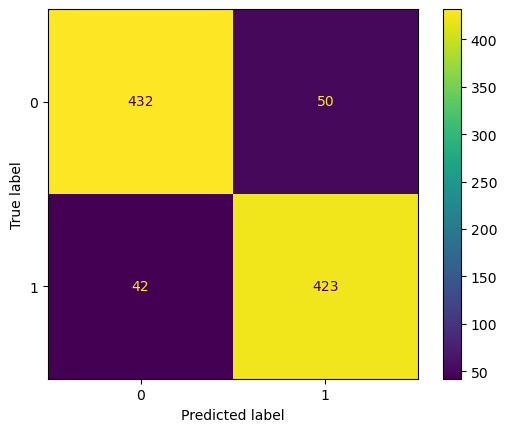

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn)

In [55]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

model_scores['K-Nearest Neighbors Classifier'] = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn,
    'ROC-AUC': roc_auc_knn,
    'Confusion Matrix': conf_matrix_knn,
    'Classification Report': class_report_knn
}

print('ACCURACY USING KNN: ',accuracy_knn)
print('PRECISION USING KNN:',precision_knn)
print('RECALL USING KNN:',recall_knn)
print('F1 USING KNN:',f1_knn)
print('ROC AUC USING KNN:',roc_auc_knn)
print('CONFUSION MATRIX USING KNN:',conf_matrix_knn)
print('\nClassification Report USING KNN:\n',class_report_knn)

ACCURACY USING KNN:  0.9028511087645196
PRECISION USING KNN: 0.8942917547568711
RECALL USING KNN: 0.9096774193548387
F1 USING KNN: 0.9019189765458422
ROC AUC USING KNN: 0.9462008655690894
CONFUSION MATRIX USING KNN: [[432  50]
 [ 42 423]]

Classification Report USING KNN:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       482
           1       0.89      0.91      0.90       465

    accuracy                           0.90       947
   macro avg       0.90      0.90      0.90       947
weighted avg       0.90      0.90      0.90       947



##### model 3- SVM (RBF kernel):

In [56]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(x_train, y_train)

SVC(random_state=42)

In [57]:
y_pred_svm = svm.predict(x_test)
y_proba_svm = knn.predict_proba(x_test)[:, 1]

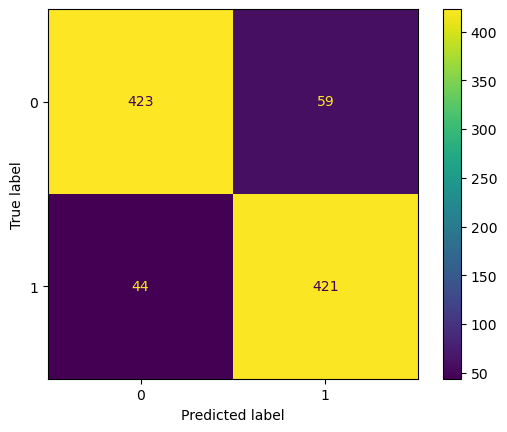

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svm)

In [59]:
accuracy_svc_rbf = accuracy_score(y_test, y_pred_svm)
precision_svc_rbf = precision_score(y_test, y_pred_svm)
recall_svc_rbf = recall_score(y_test, y_pred_svm)
f1_svc_rbf = f1_score(y_test, y_pred_svm)
roc_auc_svc_rbf = roc_auc_score(y_test, y_proba_svm)
conf_matrix_svc_rbf = confusion_matrix(y_test, y_pred_svm)
class_report_svc_rbf = classification_report(y_test, y_pred_svm)

model_scores['SVC (RBF Kernel)'] = {
    'Accuracy': accuracy_svc_rbf,
    'Precision': precision_svc_rbf,
    'Recall': recall_svc_rbf,
    'F1-Score': f1_svc_rbf,
    'ROC-AUC': roc_auc_svc_rbf,
    'Confusion Matrix': conf_matrix_svc_rbf,
    'Classification Report': class_report_svc_rbf
}

print('ACCURACY USING SVM: ',accuracy_svc_rbf)
print('PRECISION USING SVM:',precision_svc_rbf)
print('RECALL USING SVM:',recall_svc_rbf )
print('F1 USING SVM:',f1_svc_rbf)
print('ROC AUC USING SVM:',roc_auc_svc_rbf )
print('CONFUSION MATRIX USING SVM:',conf_matrix_svc_rbf )
print("\nClassification Report USING SVM:\n", class_report_svc_rbf)

ACCURACY USING SVM:  0.8912354804646251
PRECISION USING SVM: 0.8770833333333333
RECALL USING SVM: 0.9053763440860215
F1 USING SVM: 0.891005291005291
ROC AUC USING SVM: 0.9462008655690894
CONFUSION MATRIX USING SVM: [[423  59]
 [ 44 421]]

Classification Report USING SVM:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       482
           1       0.88      0.91      0.89       465

    accuracy                           0.89       947
   macro avg       0.89      0.89      0.89       947
weighted avg       0.89      0.89      0.89       947



##### model 4- DECISION TREE CLASSIFIER:

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [61]:
y_pred_dt = dt.predict(x_test)
y_proba_dt = dt.predict_proba(x_test)[:, 1]

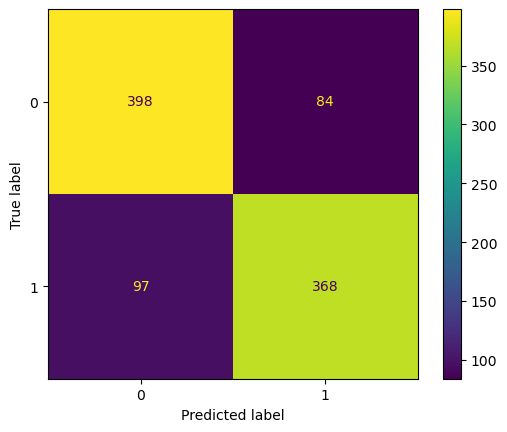

In [62]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

In [63]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt= roc_auc_score(y_test, y_proba_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

model_scores['Decision Tree Classifier'] = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt,
    'ROC-AUC': roc_auc_dt,
    'Confusion Matrix': conf_matrix_dt,
    'Classification Report': class_report_dt
}

print('ACCURACY USING DECISION TREE: ',accuracy_dt)
print('PRECISION USING DECISION TREE',precision_dt)
print('RECALL USING DECISION TREE:',recall_dt)
print('F1 USING DECISION TREE:',f1_dt)
print('ROC AUC USING DECISION TREE:',roc_auc_dt)
print('CONFUSION MATRIX USING DECISION TREE:',conf_matrix_dt)
print("\nClassification Report USING DECISION TREE:\n", class_report_dt)

ACCURACY USING DECISION TREE:  0.808870116156283
PRECISION USING DECISION TREE 0.8141592920353983
RECALL USING DECISION TREE: 0.7913978494623656
F1 USING DECISION TREE: 0.8026172300981461
ROC AUC USING DECISION TREE: 0.8085619952706019
CONFUSION MATRIX USING DECISION TREE: [[398  84]
 [ 97 368]]

Classification Report USING DECISION TREE:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       482
           1       0.81      0.79      0.80       465

    accuracy                           0.81       947
   macro avg       0.81      0.81      0.81       947
weighted avg       0.81      0.81      0.81       947



##### model 5- RANDOM FOREST CLASSIFIER:

In [64]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:, 1]

In [66]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

model_scores['Random Forest Classifier'] = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'ROC-AUC': roc_auc_rf,
    'Confusion Matrix': conf_matrix_rf,
    'Classification Report': class_report_rf

}
print('ACCURACY USING RANDOM FOREST: ',accuracy_rf)
print('PRECISION USING RANDOM FOREST:',precision_rf)
print('RECALL USING RANDOM FOREST:',recall_rf)
print('F1 USING RANDOM FOREST:',f1_rf)
print('ROC AUC USING RANDOM FOREST:',roc_auc_rf)
print('CONFUSION MATRIX USING RANDOM FOREST:',conf_matrix_rf)
print("\nClassification Report USING RANDOM FOREST:\n", class_report_rf)

ACCURACY USING RANDOM FOREST:  0.8944033790918691
PRECISION USING RANDOM FOREST: 0.8794178794178794
RECALL USING RANDOM FOREST: 0.9096774193548387
F1 USING RANDOM FOREST: 0.8942917547568711
ROC AUC USING RANDOM FOREST: 0.9589033150403784
CONFUSION MATRIX USING RANDOM FOREST: [[424  58]
 [ 42 423]]

Classification Report USING RANDOM FOREST:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       482
           1       0.88      0.91      0.89       465

    accuracy                           0.89       947
   macro avg       0.89      0.89      0.89       947
weighted avg       0.89      0.89      0.89       947



#### 6. Summary of Model Performance:
    Comparing the performance of all trained models..

In [67]:
# Create an empty table to store model results 
summary = pd.DataFrame()

# Loop through each model and add its scores to the table
for name, metrics in model_scores.items():
    summary[name] = [
        metrics['Accuracy'],
        metrics['Precision'],
        metrics['Recall'],
        metrics['F1-Score'],
        metrics['ROC-AUC']
    ]

# Set the row names (metrics)
summary.index = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

# Print the table sorted by Accuracy (best model first)
print("Overall Model Performance Comparison:")
print(summary.T.sort_values(by='Accuracy', ascending=False))

Overall Model Performance Comparison:
                                Accuracy  Precision    Recall  F1-Score  \
K-Nearest Neighbors Classifier  0.902851   0.894292  0.909677  0.901919   
Random Forest Classifier        0.894403   0.879418  0.909677  0.894292   
SVC (RBF Kernel)                0.891235   0.877083  0.905376  0.891005   
Decision Tree Classifier        0.808870   0.814159  0.791398  0.802617   
Logistic Regression             0.765576   0.762419  0.759140  0.760776   

                                 ROC-AUC  
K-Nearest Neighbors Classifier  0.946201  
Random Forest Classifier        0.958903  
SVC (RBF Kernel)                0.946201  
Decision Tree Classifier        0.808562  
Logistic Regression             0.840503  


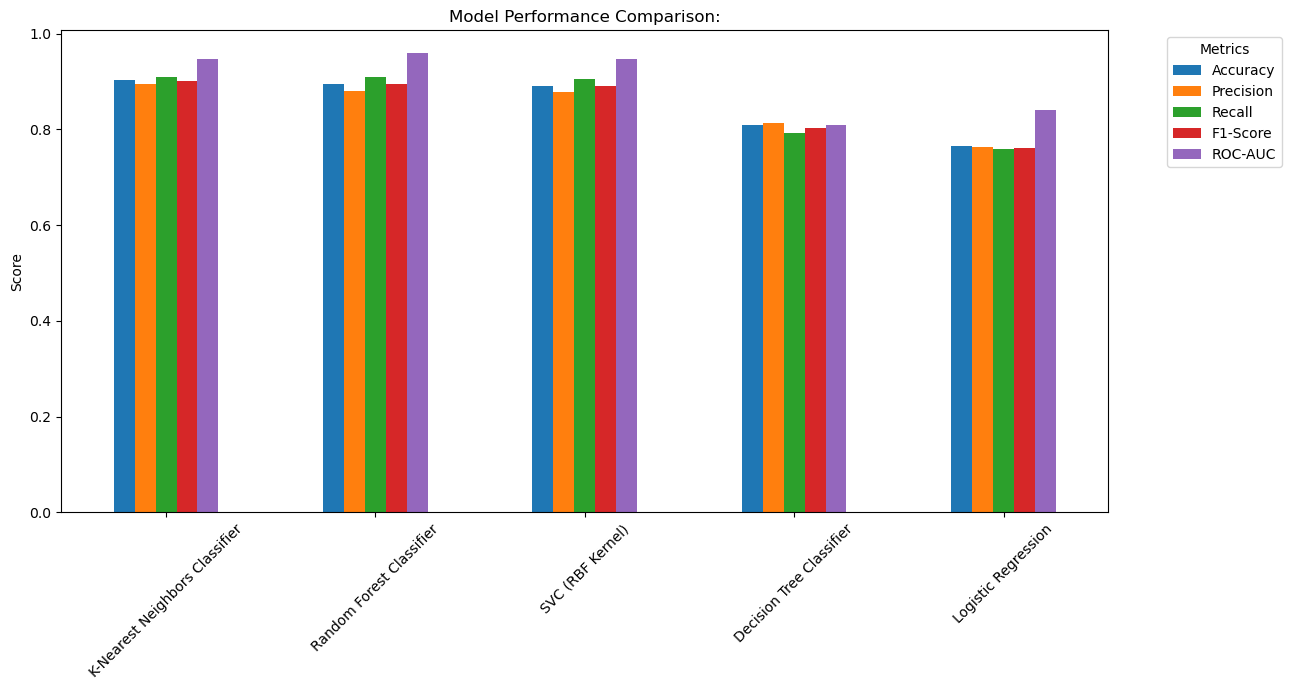

In [68]:
# Draw a bar chart for the comparison..

summary.T.sort_values(by='Accuracy', ascending=False).plot(kind='bar',figsize=(13,7))
plt.title('Model Performance Comparison:')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#### Serializing:

In [69]:
# Save the trained KNN model..
model_filename = 'knn_model.joblib'
joblib.dump(knn, model_filename)
print('KNN model is saved as ',model_filename)

# Save the scaler
scaler_filename = 'knn_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print('Scaler is saved as ',scaler_filename)

KNN model is saved as  knn_model.joblib
Scaler is saved as  knn_scaler.joblib


In [70]:
# Load the saved scaler and model
scaler = joblib.load('knn_scaler.joblib')
model = joblib.load('knn_model.joblib')  # Random Forest model

# Feature names 
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Class mapping for binary classification
class_map = {
    0: 'Bad Apple',
    1: 'Good Apple'
}

# Create GUI window
root = tk.Tk()
root.title("🍎 Fruit Quality Predictor")
root.geometry("900x600")
bg_color = '#ffe5e5'
root.configure(bg=bg_color)

tk.Label(root, text="🍎 Enter Apple Features: ", font=('Helvetica', 16, 'bold'), fg='red', bg=bg_color).pack(pady=10)

# Store entry boxes
entries = []

# Create input fields for each feature
for feature in features:
    tk.Label(root, text=feature, font=('Helvetica', 14), bg=bg_color).pack(pady=(5, 0))
    entry = tk.Entry(root, width=25, font=('Helvetica', 14))
    entry.pack(pady=5)
    entries.append(entry)

# Prediction function
def predict():
    try:
        input_values = [float(entry.get()) for entry in entries]
        input_array = np.array(input_values).reshape(1, -1)

        # Scale input
        scaled_input = scaler.transform(input_array)

        # Predict
        prediction = model.predict(scaled_input)
        predicted_label = class_map.get(prediction[0], f"Class {prediction[0]}")

        messagebox.showinfo("Prediction",f"Prediction: {predicted_label}")

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numerical values for all fields.")

# Predict button
tk.Button(
    root,
    text="Predict",
    command=predict,
    bg='purple',
    fg='white',
    font=('Helvetica', 12, 'bold'),
    padx=10,
    pady=5
).pack(pady=20)

# Run the app
root.mainloop()
